In [ ]:
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination     

# Core Tasks

1. **Graphical Model:**  
    Use your intuition to design a directed graphical model for the twelve variables outlined above. Implement it in the programming language of your choice. You could begin your implementation work using simply randomly-assigned parameters. Given these parameters, and an assignment to 12 of the variables, your implementation should be able to return the probability of the full assignment.

I have used Baseline Graphical Model

In [35]:
from pgmpy.models import DiscreteBayesianNetwork
import matplotlib.pyplot as plt
import networkx as nx
# Define the structure of the Bayesian Network
baseline_model = DiscreteBayesianNetwork([
    ('IsSummer', 'HasHayFever'),
    ('HasHayFever', 'HasRash'),
    ('HasHayFever', 'Coughs'),
    ('HasFlu', 'Coughs'),
    ('HasFlu', 'HasFever'),
    ('HasFlu', 'IsFatigued'),
    ('HasPneumonia', 'Coughs'),
    ('HasPneumonia', 'HasFever'),
    ('HasPneumonia', 'IsFatigued'),
    ('HasPneumonia', 'HasRespiratoryProblems'),
    ('HasFoodPoisoning', 'Vomits'),
    ('HasFoodPoisoning', 'HasGastricProblems'),
    ('HasFoodPoisoning', 'IsFatigued')
])

# View structure
print("Edges of the baseline model:")
print(baseline_model.edges())

Edges of the baseline model:
[('IsSummer', 'HasHayFever'), ('HasHayFever', 'HasRash'), ('HasHayFever', 'Coughs'), ('HasFlu', 'Coughs'), ('HasFlu', 'HasFever'), ('HasFlu', 'IsFatigued'), ('HasPneumonia', 'Coughs'), ('HasPneumonia', 'HasFever'), ('HasPneumonia', 'IsFatigued'), ('HasPneumonia', 'HasRespiratoryProblems'), ('HasFoodPoisoning', 'Vomits'), ('HasFoodPoisoning', 'HasGastricProblems'), ('HasFoodPoisoning', 'IsFatigued')]


C:\Users\user\AppData\Local\Temp\ipykernel_11648\3119002339.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


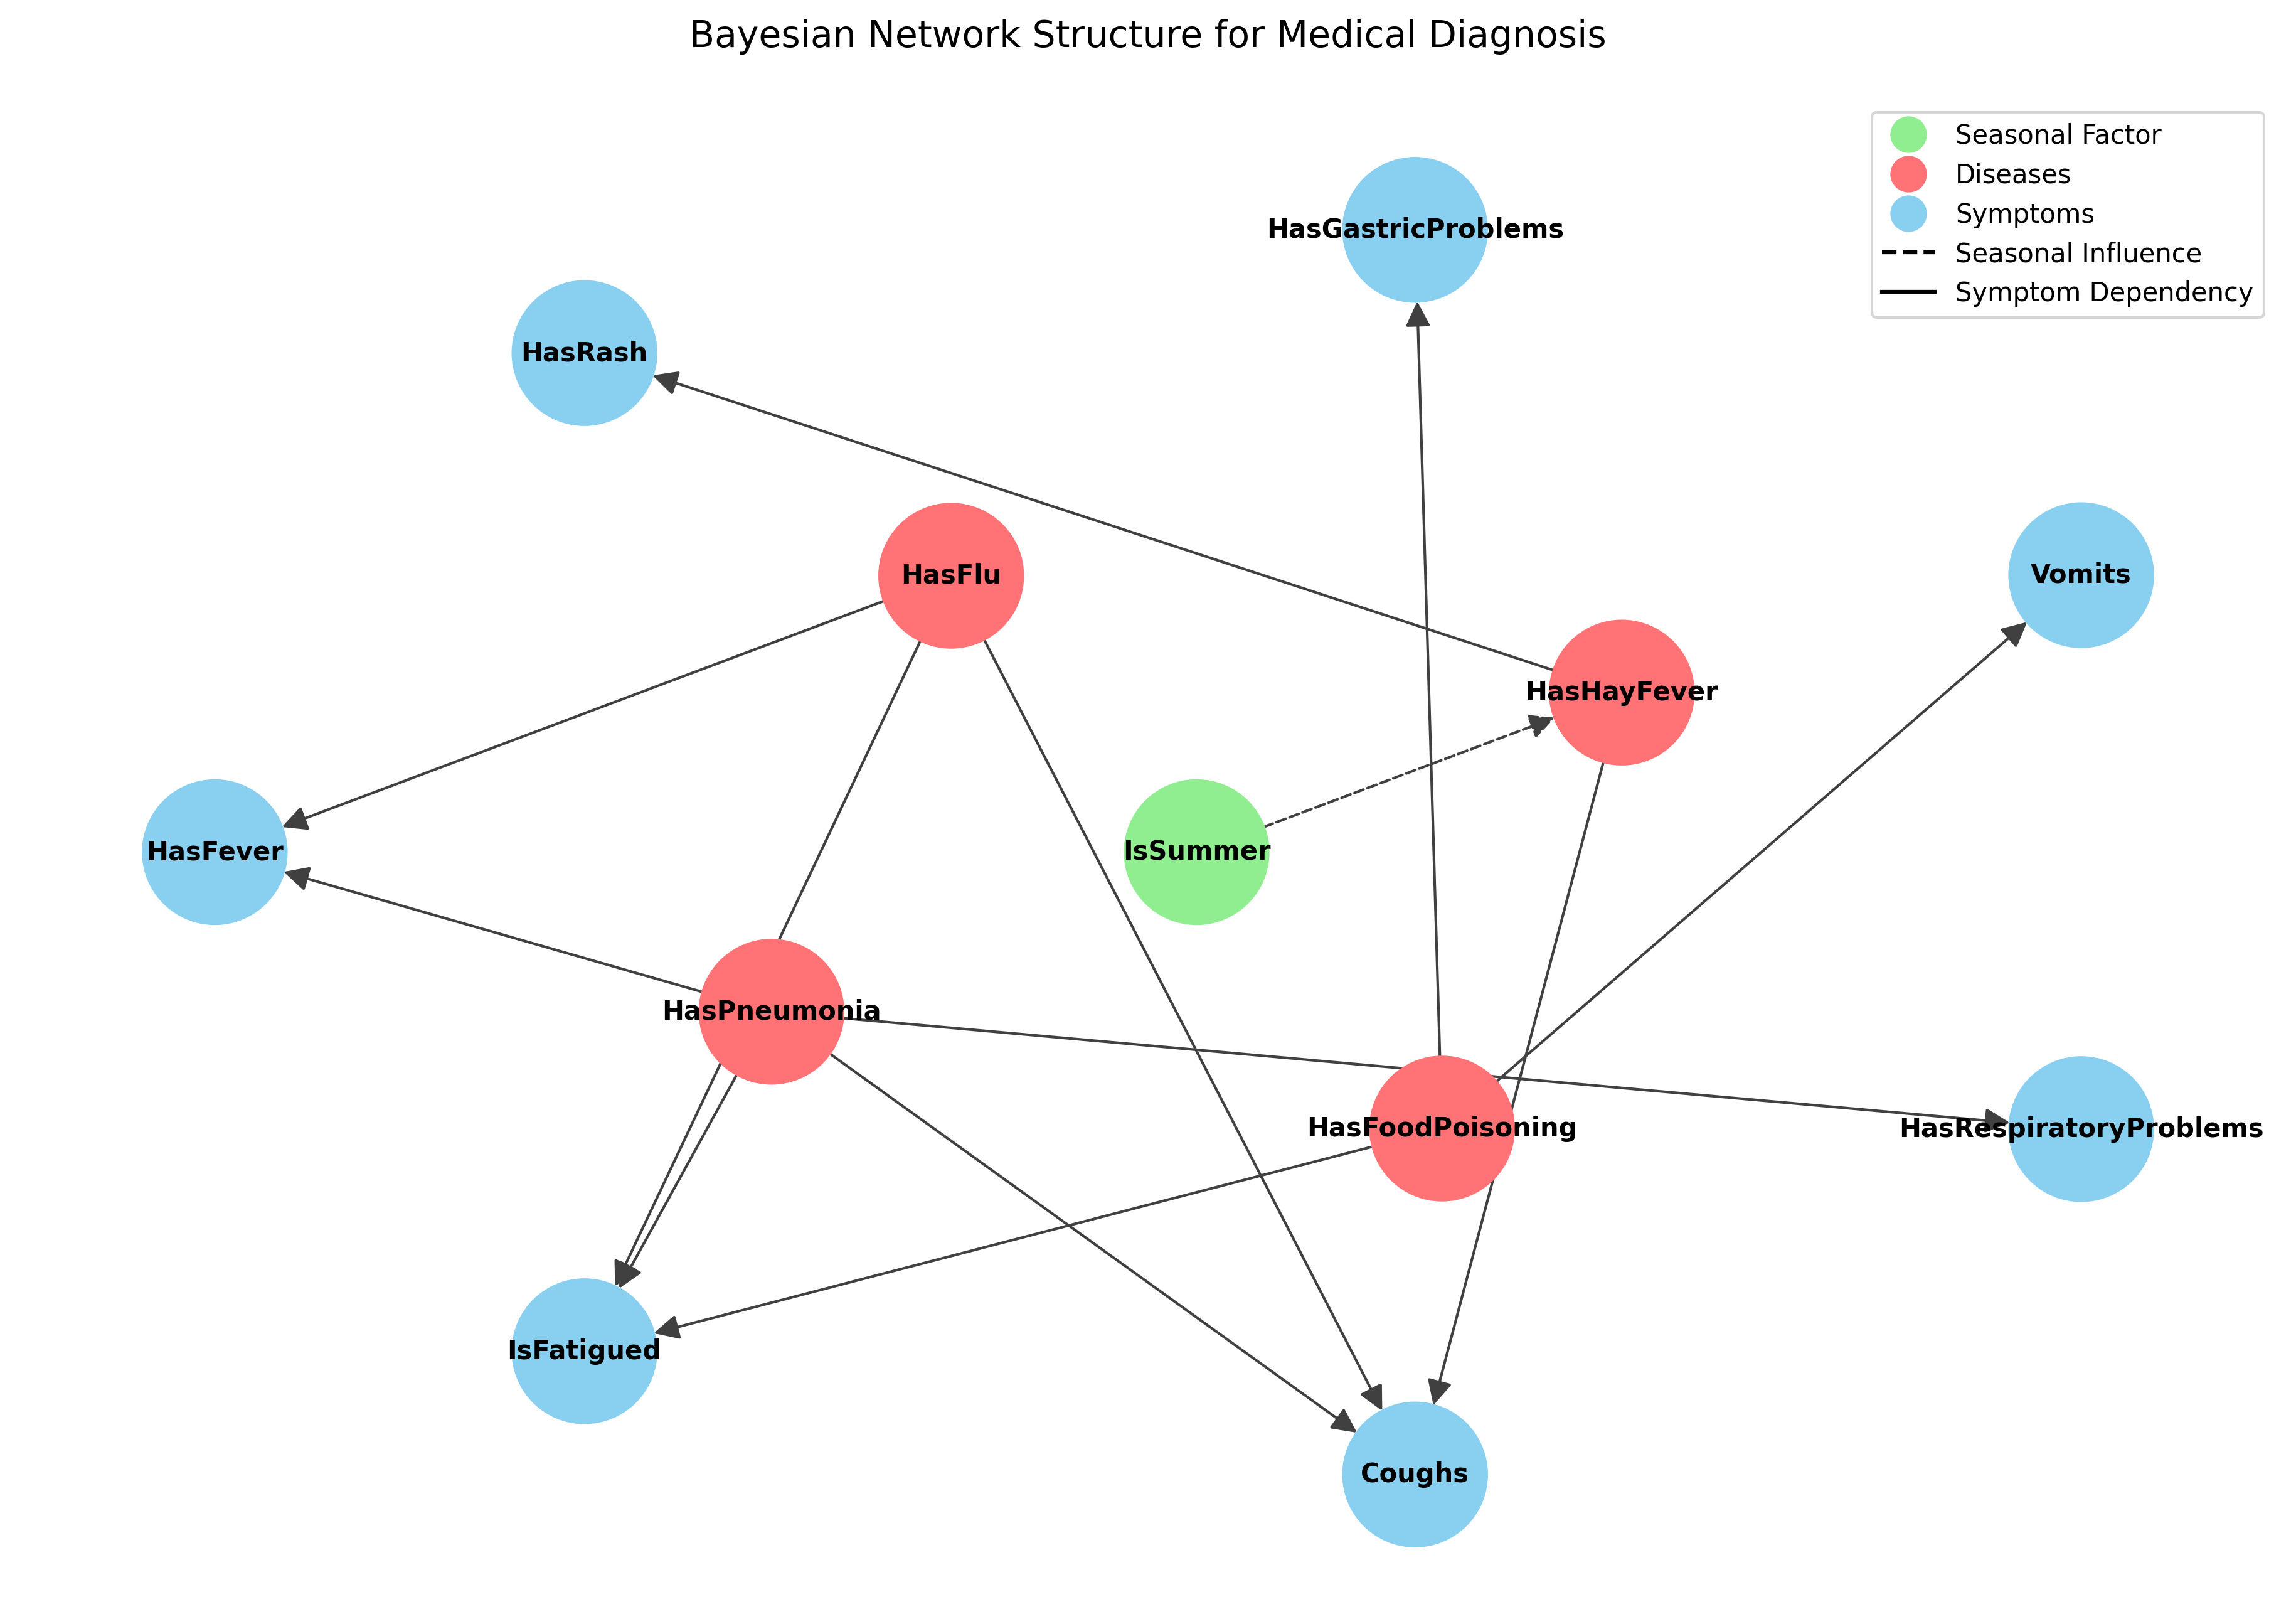

In [36]:


nx_graph = nx.DiGraph()
nx_graph.add_edges_from(baseline_model.edges())

# Set node properties
node_colors = []
node_categories = {
    'seasonal': ['IsSummer'],
    'diseases': ['HasFlu', 'HasPneumonia', 'HasFoodPoisoning', 'HasHayFever'],
    'symptoms': ['HasFever', 'IsFatigued', 'Coughs', 'HasRespiratoryProblems',
                 'Vomits', 'HasGastricProblems', 'HasRash']
}

for node in nx_graph.nodes():
    if node in node_categories['seasonal']:
        node_colors.append('#90EE90')  # Light green
    elif node in node_categories['diseases']:
        node_colors.append('#FF7276')  # Light red
    else:
        node_colors.append('#89CFF0')  # Light blue

# Set edge styles
edge_styles = []
for u, v in nx_graph.edges():
    if u == 'IsSummer':
        edge_styles.append('--')  # Dashed for seasonal influences
    else:
        edge_styles.append('-')  # Solid for symptom dependencies

# Draw the graph
plt.figure(figsize=(12, 8), dpi=300)
pos = nx.shell_layout(nx_graph, [
    node_categories['seasonal'],
    node_categories['diseases'],
    node_categories['symptoms']
])

nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color=node_colors, 
        font_size=10, font_weight='bold', arrowsize=20, 
        edge_color='#404040', style=edge_styles)

# Create legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Seasonal Factor',
               markerfacecolor='#90EE90', markersize=15),
    plt.Line2D([0], [0], marker='o', color='w', label='Diseases',
               markerfacecolor='#FF7276', markersize=15),
    plt.Line2D([0], [0], marker='o', color='w', label='Symptoms',
               markerfacecolor='#89CFF0', markersize=15),
    plt.Line2D([0], [0], color='black', linestyle='--', label='Seasonal Influence'),
    plt.Line2D([0], [0], color='black', linestyle='-', label='Symptom Dependency')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=10)
plt.title("Bayesian Network Structure for Medical Diagnosis", fontsize=14, pad=20)
plt.tight_layout()

# Save high-resolution image
plt.savefig('bayesian_network.png', bbox_inches='tight', dpi=300)
plt.show()



I first implemented a baseline graphical model where all variables are
assumed to be independent. That model only needs 12 parameters and its accuracy, as measured by the
`1-distance of the model and the true joint probability distribution, is equal to 0.6960. Furthermore,
the log-likelihood value for the data is equal to −17, 177, 497.9001.


In [18]:
import os, sys
import pandas as pd
# Add the 'data' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'data')))

# Variable names by index
var_names = [
    "IsSummer", "HasFlu", "HasFoodPoisoning", "HasHayFever", "HasPneumonia",
    "HasRespiratoryProblems", "HasGastricProblems", "HasRash", "Coughs",
    "IsFatigued", "Vomits", "HasFever"
]

def load_joint_distribution(file_path):
    with open(file_path, "r") as file:
        binary_data = []
        for line in file:
            binary_data.append(format(int(line.strip()), "012b"))
        data = [[int(b) for b in row] for row in binary_data]
        return pd.DataFrame(data, columns=var_names)


# Load the joint distribution DataFrame
dataset_df = load_joint_distribution("../data/dataset.dat")



In [19]:
dataset_df

,IsSummer,HasFlu,HasFoodPoisoning,HasHayFever,HasPneumonia,HasRespiratoryProblems,HasGastricProblems,HasRash,Coughs,IsFatigued,Vomits,HasFever
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,0,0,0,0,1,0,0,0,0,0,0,1
3999996,1,0,1,1,1,0,1,0,1,0,0,0
3999997,0,0,0,0,0,0,0,0,0,0,0,0
3999998,0,0,0,0,0,0,0,0,0,0,0,1


## Task 2: Estimating Parameters

Use the dataset (`dataset.dat`) to estimate the parameters of your graphical model. This can be achieved by simply counting and normalizing:

- **Enumerate all assignments** in the dataset.
- For each variable *v*, **count the number of times the variable is true** for each assignment to its parents.
- **Normalize the counts** by dividing by the total number of times the parents had that assignment.

This process yields the conditional probability tables (CPTs) required for the Bayesian network.

In [25]:
from pgmpy.estimators import MaximumLikelihoodEstimator
baseline_model.fit(dataset_df, estimator=MaximumLikelihoodEstimator)
# print("\nConditional Probability Table for HasFlu:")
# print(baseline_model.get_cpds("HasFlu"))
# print(f'\nConditional Probability Table for IsSummer')
# print(baseline_model.get_cpds('IsSummer'))
# print(baseline_model.check_model())
for var in var_names:
    print(f"\nConditional Probability Table for {var}:")
    print(baseline_model.get_cpds(var))

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'IsSummer': 'N', 'HasFlu': 'N', 'HasFoodPoisoning': 'N', 'HasHayFever': 'N', 'HasPneumonia': 'N', 'HasRespiratoryProblems': 'N', 'HasGastricProblems': 'N', 'HasRash': 'N', 'Coughs': 'N', 'IsFatigued': 'N', 'Vomits': 'N', 'HasFever': 'N'}



Conditional Probability Table for IsSummer:
+-------------+-----------+
| IsSummer(0) | 0.947192  |
+-------------+-----------+
| IsSummer(1) | 0.0528075 |
+-------------+-----------+

Conditional Probability Table for HasFlu:
+-----------+-----------+
| HasFlu(0) | 0.902823  |
+-----------+-----------+
| HasFlu(1) | 0.0971773 |
+-----------+-----------+

Conditional Probability Table for HasFoodPoisoning:
+---------------------+----------+
| HasFoodPoisoning(0) | 0.798427 |
+---------------------+----------+
| HasFoodPoisoning(1) | 0.201572 |
+---------------------+----------+

Conditional Probability Table for HasHayFever:
+----------------+---------------------+--------------------+
| IsSummer       | IsSummer(0)         | IsSummer(1)        |
+----------------+---------------------+--------------------+
| HasHayFever(0) | 0.8218350546483424  | 0.6489845192444255 |
+----------------+---------------------+--------------------+
| HasHayFever(1) | 0.17816494535165767 | 0.3510154807555

### 3. Model Accuracy

Measure the similarity of your model to the true joint probability distribution (i.e., `joint.dat`). For each assignment, compare the probabilities returned by your model to the true probability distribution. To keep things simple, you can use the **L1-distance** as a metric. For each assignment \( a_i \) to all the variables, obtain \( p(a_i) \) from the true joint distribution (the \((i+1)\)th row in `joint.dat`) and \( p(a_i) \) using your model. The distance is defined as:

\[
|p(a_0) - p(a_0)| + |p(a_1) - p(a_1)| + \ldots + |p(a_{4095}) - p(a_{4095})|
\]

An alternative distance measure, more appropriate for probability distributions, is **KL-divergence**. If you are familiar with KL-divergence and wish to use it, you may also evaluate your model using this metric.

In [26]:
joint_distribution = {}
with open('../data/joint.dat', 'r') as file:
    for line in file:
        idx,parts = line.strip().split()
        joint_distribution[int(idx)] = float(parts)
print(joint_distribution)

{0: 0.29425875824822, 1: 0.10221620023359, 2: 0.0038311201152, 3: 0.00025540800768, 4: 0.02335386970224, 5: 0.00811239684394, 6: 0.000304057152, 7: 2.02704768e-05, 8: 0.0371538836172, 9: 0.01290608588808, 10: 0.0006385200192, 11: 4.256800128e-05, 12: 0.002948720922, 13: 0.0010242925308, 14: 5.0676192e-05, 15: 3.3784128e-06, 16: 0.0001579014, 17: 5.484996e-05, 18: 6.64848e-07, 19: 4.43232e-08, 20: 1.315845e-05, 21: 4.57083e-06, 22: 5.5404e-08, 23: 3.6936e-09, 24: 2.368521e-05, 25: 8.227494e-06, 26: 8.3106e-09, 27: 5.5404e-10, 28: 1.9737675e-06, 29: 6.856245e-07, 30: 6.9255e-10, 31: 4.617e-11, 32: 0.00036695193696, 33: 0.00012746751494, 34: 0.000315318528, 35: 2.10212352e-05, 36: 2.91231696e-05, 37: 1.011646944e-05, 38: 2.502528e-05, 39: 1.668352e-06, 40: 0.004586899212, 41: 0.0015933439368, 42: 0.000118244448, 43: 7.8829632e-06, 44: 0.00036403962, 45: 0.000126455868, 46: 9.38448e-06, 47: 6.25632e-07, 48: 5.8482e-05, 49: 2.03148e-05, 50: 3.2832e-07, 51: 2.1888e-08, 52: 4.8735e-06, 53: 1.

In [27]:
import numpy as np
P = [joint_distribution[i] for i in range(2**12)]
Q = []

for i in range(2**12):
    assignment_bits = format(i, "012b")
    evidence = {var_names[j]: int(assignment_bits[j]) for j in range(12)}

    prob = 1.0 # initial probability
    for i in range(len(var_names)):
        cpd = baseline_model.get_cpds(var_names[i])
        parent_vals = {}
        for p in cpd.get_evidence():
            parent_vals[p] = evidence[p]
        prob *= cpd.get_value(**{**parent_vals, var_names[i]: evidence[var_names[i]]}) ## Query based on names
    Q.append(prob)
epsilon = 1e-15
Q = np.clip(np.array(Q), epsilon, 1.0)
P = np.clip(np.array(P), epsilon, 1.0)
kl_divergence = np.sum(P * np.log(P / Q))
print("KL Divergence:", kl_divergence)

KL Divergence: 0.5445797788004726


#### 4. Querying

Use the graphical model above to answer queries involving observed variables (with known assignments) and query variables (for which we want the distribution). The remaining variables should be marginalized by summing them out. Since the domain is small, this conditioning and marginalization can be implemented by exhaustively enumerating all assignments—only considering assignments consistent with the observed values.

Compare the results of these queries on your model to those obtained from the true joint probability distribution. Design queries that demonstrate:

- **Causal reasoning** (e.g., effect of a cause)
- **Evidential reasoning** (e.g., inferring cause from effect)
- **Inter-causal reasoning** (e.g., explaining away)

**Example queries:**

- What is the probability a patient has flu given they are coughing and have a high fever?  
    *Observed Variables*: `HasFever=true`, `Coughs=true`; *Query Variable*: `HasFlu`

- What is the probability distribution over the symptoms (`HasRash`, `Coughs`, `IsFatigued`, `Vomits`, `HasFever`) given the patient has pneumonia?

- What is the probability of vomiting in summer?

Feel free to create additional queries to further explore the model's reasoning capabilities.

In [28]:
def int_to_assignment(i):
    return [int(b) for b in format(i, '012b')]


In [29]:
import numpy as np

def query_joint_distribution(joint_dist, evidence={}, query_vars=[]):
    total_prob = 0.0
    query_counts = {}

    for i in range(2**12):
        assign = int_to_assignment(i)

        # check if this assignment matches the evidence
        if all(assign[var_names.index(k)] == v for k, v in evidence.items()):
            p = joint_dist[i]
            total_prob += p

            # build query var assignment
            key = tuple(assign[var_names.index(q)] for q in query_vars)
            query_counts[key] = query_counts.get(key, 0.0) + p

    # normalize
    for k in query_counts:
        query_counts[k] /= total_prob

    return query_counts


**Query 1: Causal Reasoning**

**Question:**  
What is the probability a patient has flu given they are coughing and have a high fever?  
*Formally:*  
\( P(\text{HasFlu} \mid \text{HasFever} = \text{True}, \text{Coughs} = \text{True}) \)

**Observed Variables:**  
- HasFever = True  
- Coughs = True  

**Query Variable:**  
- HasFlu

**Interpretation:**  
This query demonstrates *causal reasoning*: inferring the likelihood of a cause (HasFlu) given observed effects (HasFever and Coughs). The model will marginalize over all other variables to compute the conditional probability.

In [30]:
evidence = {"HasFever": 1, "Coughs": 1}
query_vars = ["HasFlu"]
result = query_joint_distribution(joint_distribution, evidence, query_vars)
print("P(HasFlu | HasFever=True, Coughs=True):", result)

P(HasFlu | HasFever=True, Coughs=True): {(0,): 0.9026449999988101, (1,): 0.09735500000119135}


### Query 2: Evidential Reasoning

**Question:**  
What is the probability distribution over the symptoms (`HasRash`, `Coughs`, `IsFatigued`, `Vomits`, `HasFever`) given the patient has pneumonia?  
*Formally:*  
\( P(\text{HasRash}, \text{Coughs}, \text{IsFatigued}, \text{Vomits}, \text{HasFever} \mid \text{HasPneumonia} = \text{True}) \)

**Observed Variable:**  
- HasPneumonia = True

**Query Variables:**  
- HasRash
- Coughs
- IsFatigued
- Vomits
- HasFever

**Interpretation:**  
This query demonstrates *evidential reasoning*: inferring the likelihood of various symptoms (effects) given evidence about a possible cause (HasPneumonia). The model will marginalize over all other variables to compute the joint distribution over the symptoms.

In [31]:
evidence = {"HasPneumonia": 1}
query_vars = ["HasRash", "Coughs", "IsFatigued", "Vomits", "HasFever"]
result = query_joint_distribution(joint_distribution, evidence, query_vars)
print("P(symptoms | HasPneumonia=True):")
for k, v in result.items():
    print(f"{dict(zip(query_vars, k))} : {v:.4f}")

P(symptoms | HasPneumonia=True):
{'HasRash': 0, 'Coughs': 0, 'IsFatigued': 0, 'Vomits': 0, 'HasFever': 0} : 0.5027
{'HasRash': 0, 'Coughs': 0, 'IsFatigued': 0, 'Vomits': 0, 'HasFever': 1} : 0.1746
{'HasRash': 0, 'Coughs': 0, 'IsFatigued': 0, 'Vomits': 1, 'HasFever': 0} : 0.0265
{'HasRash': 0, 'Coughs': 0, 'IsFatigued': 0, 'Vomits': 1, 'HasFever': 1} : 0.0018
{'HasRash': 0, 'Coughs': 0, 'IsFatigued': 1, 'Vomits': 0, 'HasFever': 0} : 0.0559
{'HasRash': 0, 'Coughs': 0, 'IsFatigued': 1, 'Vomits': 0, 'HasFever': 1} : 0.0194
{'HasRash': 0, 'Coughs': 0, 'IsFatigued': 1, 'Vomits': 1, 'HasFever': 0} : 0.0029
{'HasRash': 0, 'Coughs': 0, 'IsFatigued': 1, 'Vomits': 1, 'HasFever': 1} : 0.0002
{'HasRash': 0, 'Coughs': 1, 'IsFatigued': 0, 'Vomits': 0, 'HasFever': 0} : 0.1257
{'HasRash': 0, 'Coughs': 1, 'IsFatigued': 0, 'Vomits': 0, 'HasFever': 1} : 0.0437
{'HasRash': 0, 'Coughs': 1, 'IsFatigued': 0, 'Vomits': 1, 'HasFever': 0} : 0.0066
{'HasRash': 0, 'Coughs': 1, 'IsFatigued': 0, 'Vomits': 1, 'HasFev

### Query 3: Inter-causal Reasoning

**Question:**  
What is the probability of vomiting given that it is summer?  
*Formally:*  
\( P(\text{Vomits} = \text{True} \mid \text{IsSummer} = \text{True}) \)

**Observed Variable:**  
- IsSummer = True

**Query Variable:**  
- Vomits

**Interpretation:**  
This query demonstrates *inter-causal reasoning*: assessing the likelihood of a symptom (Vomits) given seasonal context (IsSummer), marginalizing over all other variables. This helps explore how indirect relationships and multiple causes interact in the model.

In [32]:
evidence = {"IsSummer": 1}
query_vars = ["Vomits"]
result = query_joint_distribution(joint_distribution, evidence, query_vars)
print("P(Vomits | IsSummer=True):", result)

P(Vomits | IsSummer=True): {(0,): 0.5392439653864991, (1,): 0.46075603461350645}
